# SVM

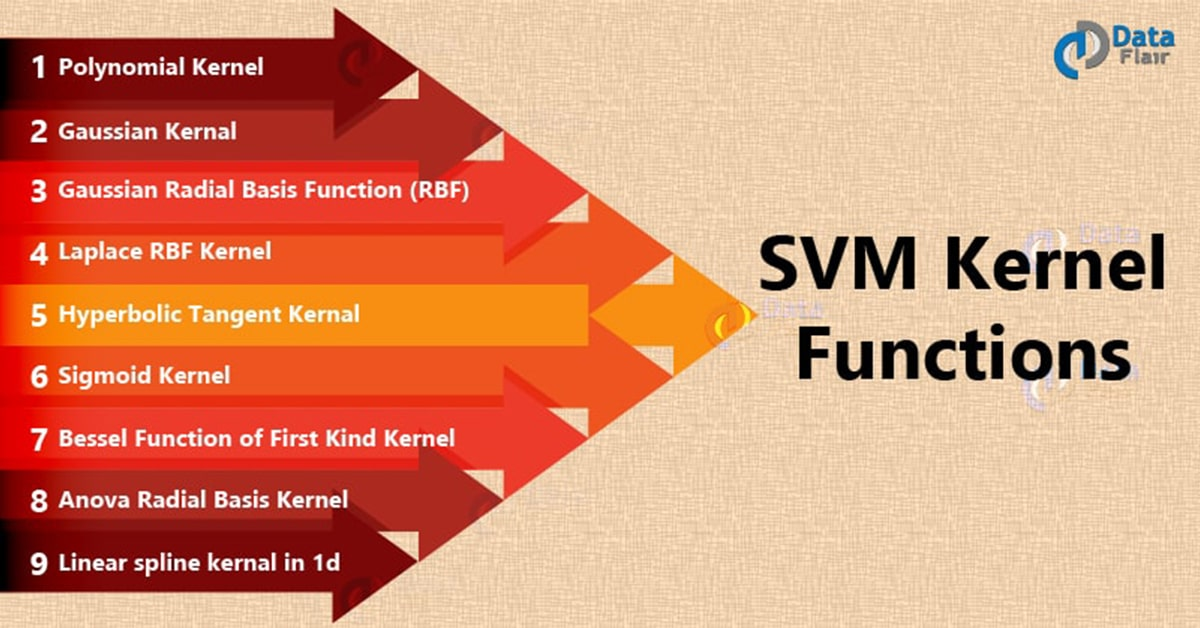

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

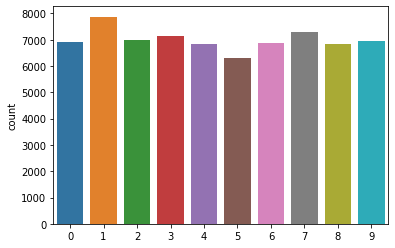

In [3]:
sns.countplot(mnist.target)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=0.2, 
                                                            stratify = mnist.target, random_state=0)

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
steps = [('scaler', StandardScaler()), 
         ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object

In [7]:
parameters = {'SVM__C':[5], 'SVM__gamma':[0.05]}
grid = GridSearchCV(pipeline, 
                    param_grid=parameters, 
                    cv=5, verbose=1, n_jobs=-1)

In [8]:
grid.fit(train_img, train_lbl)
print("score = %3.2f" %(grid.score(test_img, test_lbl)))
print("best parameters from train data: ", grid.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 26.5min finished


score = 0.98
best parameters from train data:  {'SVM__C': 5, 'SVM__gamma': 0.05}


In [9]:
y_pred = grid.predict(test_img)

In [10]:
print(classification_report(test_lbl,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.97      0.98      0.97      1398
           3       0.98      0.97      0.98      1428
           4       0.97      0.98      0.98      1365
           5       0.98      0.98      0.98      1263
           6       0.98      0.99      0.99      1375
           7       0.98      0.98      0.98      1458
           8       0.97      0.98      0.97      1365
           9       0.98      0.97      0.97      1392

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



ValueError: Could not interpret input 'SVM__C'

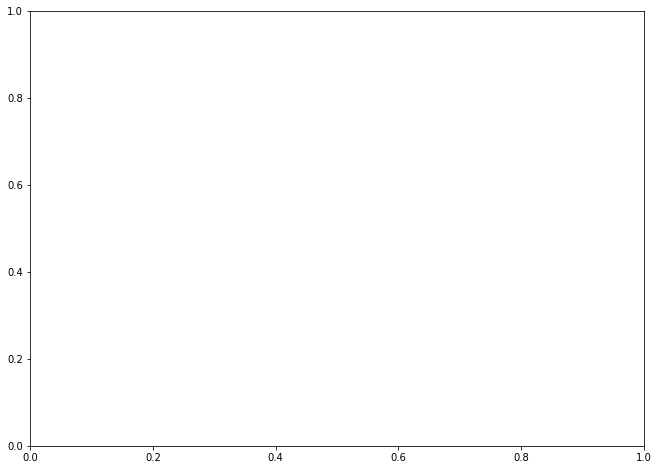

In [15]:
def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = param_x
    col_z = param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid.cv_results_, 'SVM__C', 'SVM__gamma')

# Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

params = {'hidden_layer_sizes': [(256), (512,), (128, 256, 128,)]}
mlp = MLPClassifier(verbose=10, learning_rate='adaptive')
clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)

clf.fit(train_img, train_lbl)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 34.8min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 36.2min remaining:  9.0min


In [ ]:
y_pred1 = clf.predict(test_img)

In [ ]:
print(classification_report(test_lbl,y_pred1))